In [1]:

import random
import matplotlib.pyplot as plt

In [2]:
import networkx as nx
g = nx.erdos_renyi_graph(30, 0.05, directed=True, seed=42)

In [3]:
g

In [4]:
def PageRankSim(g, steps, alpha):
    results = []
    prev = random.choice(list(g.nodes())) # init at random 
    # Stores frequency
    freqMap = {key: 0 for key in list(g.nodes())}
    
    for step in range(steps):
        # Checks if random node or neighbor
        if random.random() < alpha: # neighbor 
            # Checks if node has neighbors
            if len(list(g.edges(prev))) > 0:
                edge = random.choice(list(g.edges(prev)))
                new_node = edge[1]
                freqMap[new_node] += 1
            else:
                new_node = random.choice(list(g.nodes()))
                freqMap[new_node] += 1
        else: # random 
            new_node = random.choice(list(g.nodes()))
            freqMap[new_node] += 1
            
        prev = new_node
        
        # Gets normalized frequency
        simResult = freqMap.copy()
        overall_sum = sum(simResult.values())
        for k in simResult:
            simResult[k] = round(freqMap[k]/overall_sum,10)
            
        # Add frequency dictionary to map
        results.append(simResult.copy())
        
    # Return results
    return results

In [5]:
simResults = PageRankSim(g, 10000, 0.85)

In [6]:
simResults[-1]

{0: 0.0517,
 1: 0.0139,
 2: 0.0379,
 3: 0.0259,
 4: 0.013,
 5: 0.0294,
 6: 0.05,
 7: 0.0469,
 8: 0.0624,
 9: 0.0526,
 10: 0.072,
 11: 0.0274,
 12: 0.014,
 13: 0.0364,
 14: 0.0276,
 15: 0.0134,
 16: 0.0135,
 17: 0.039,
 18: 0.0772,
 19: 0.0131,
 20: 0.0459,
 21: 0.0252,
 22: 0.0558,
 23: 0.0295,
 24: 0.0258,
 25: 0.0137,
 26: 0.0237,
 27: 0.0125,
 28: 0.014,
 29: 0.0366}

In [7]:
diffResults = []

for res in simResults:
    # Calculates difference
    difference = 0
    for k in res:
        difference += abs(res[k]-nx.pagerank(g)[k])
    diffResults.append(difference)

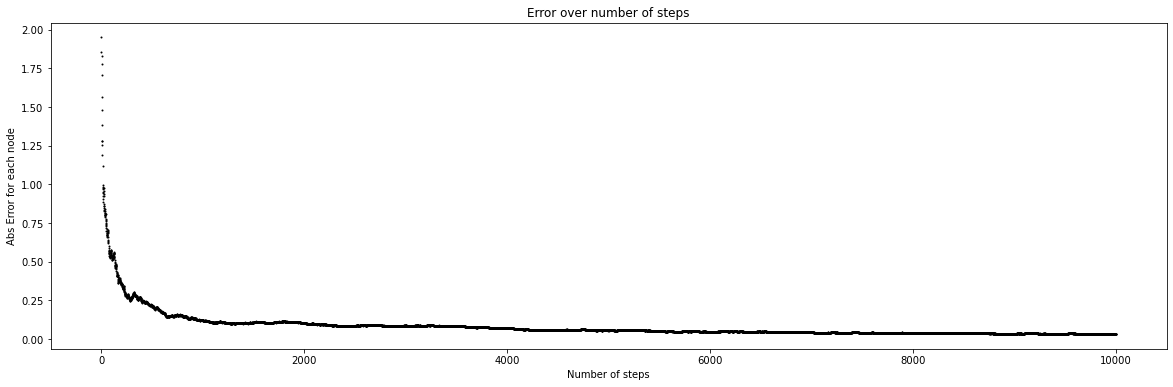

In [8]:
plt.figure(figsize=(20,6))
plt.scatter([i for i in range(10000)], diffResults, color="black", s=1)
plt.xlabel("Number of steps")
plt.ylabel("Abs Error for each node")
plt.title("Error over number of steps")
plt.show()

NetworkX PageRank Coloring


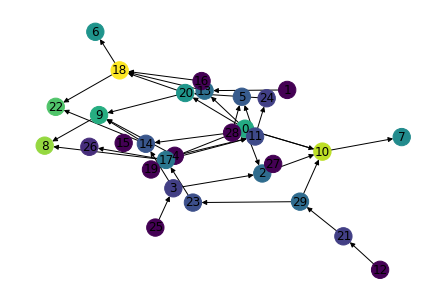

In [9]:
pr = nx.pagerank(g)
values = [pr.get(node, 0) for node in g.nodes()]
print("NetworkX PageRank Coloring")
nx.draw(g, pos=nx.kamada_kawai_layout(g), with_labels=True, node_color=values)

Simulation PageRank Coloring


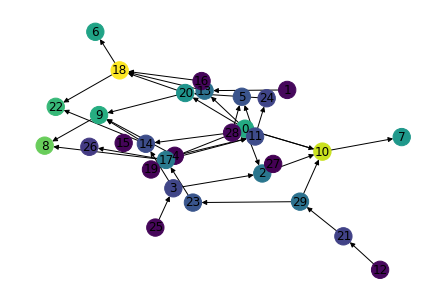

In [10]:
pr = simResults[-1]
values = [pr.get(node, 0) for node in g.nodes()]
print("Simulation PageRank Coloring")
nx.draw(g, pos=nx.kamada_kawai_layout(g), with_labels=True, node_color=values)